In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [63]:
data = pd.read_csv("./ljq_weibo.csv")
del data['Unnamed: 0']
print(data.columns)

Index(['id', 'bid', '正文', '日期', '点赞数', '评论数', '转发数', '发表时间'], dtype='object')


In [64]:
data = data[data.duplicated(subset="id") == False]
data

,id,bid,正文,日期,点赞数,评论数,转发数,发表时间
0,4954901345207820,Nn2eylQN6,《所有女生的offer3》第二集\n护肤、美妆、卸妆都到位！#所有女生的offer# \n李...,2023-10-09T12:00:01,18080,2793,1804,2023-10-09 12:00:01
1,4954599356893911,NmUntsVq7,《所有女生的offer3》特别篇（下）\n岛上谈判，背水一战！大offer，我来了！#所有女...,2023-10-08T16:00:01,9658,2144,2027,2023-10-08 16:00:01
2,4954538954459468,NmSO3iI6U,《所有女生的offer3》特别篇（上）\n不谈offer？和新老朋友的快乐小岛团建来咯！#所...,2023-10-08T12:00:00,13670,4424,4611,2023-10-08 12:00:00
3,4947773079158815,Nk2NlCqCP,母婴节来咯~正在直播中，场面异常火爆，小伙伴们速来围观~\n微博直播\n,2023-09-19T19:54:49,210612,70549,291,2023-09-19 19:54:49
4,4944598297740136,NiIcJwtyU,今天没有用“所有女生”开头，因为李佳琦让大家失望了，在看这条微博的所有人，对不起。\n我刚刚...,2023-09-11T01:39:23,7500438,333441,23785,2023-09-11 01:39:23
5,4944482783466211,NiFcqexID,爆款好价单品推荐中~正在直播中，场面异常火爆，小伙伴们速来围观~\n微博直播\n,2023-09-10T18:00:22,1024545,181467,1393,2023-09-10 18:00:22
6,4944399279327480,NiD1JD8ve,分享在内蒙出差的趣事\n就一个要求，不要截表情包[老师爱你] \n李佳琦Austin的微博视...,2023-09-10T12:28:33,443838,20312,601,2023-09-10 12:28:33
7,4944106116617230,NivoTrLrw,99大促第四波来咯~正在直播中，场面异常火爆，小伙伴们速来围观~\n微博直播\n,2023-09-09T17:03:38,47141,2819,72,2023-09-09 17:03:38
8,4943743373543979,NilXPeRWX,99大促第三波来咯~正在直播中，场面异常火爆，小伙伴们速来围观~\n微博直播\n,2023-09-08T17:02:13,10189,2166,63,2023-09-08 17:02:13
9,4943380536888053,NicwBsTTD,99大促第二波来咯~正在直播中，场面异常火爆，小伙伴们速来围观~\n微博直播\n,2023-09-07T17:00:26,18589,17108,302,2023-09-07 17:00:26


In [65]:
data['heat'] = data['点赞数'] * 0.77 + data['评论数'] * 0.81 + data['转发数']
data_show = data[['日期','点赞数','评论数','转发数','heat']]
data_show

,日期,点赞数,评论数,转发数,heat
0,2023-10-09T12:00:01,18080,2793,1804,17987.93
1,2023-10-08T16:00:01,9658,2144,2027,11200.30
2,2023-10-08T12:00:00,13670,4424,4611,18720.34
3,2023-09-19T19:54:49,210612,70549,291,219606.93
4,2023-09-11T01:39:23,7500438,333441,23785,6069209.47
5,2023-09-10T18:00:22,1024545,181467,1393,937280.92
6,2023-09-10T12:28:33,443838,20312,601,358808.98
7,2023-09-09T17:03:38,47141,2819,72,38653.96
8,2023-09-08T17:02:13,10189,2166,63,9662.99
9,2023-09-07T17:00:26,18589,17108,302,28473.01


In [66]:
a= []
for val in list(data_show['日期'].values):
    a.append(val[:10])
a[::-1]

['2023-08-14',
 '2023-08-18',
 '2023-08-23',
 '2023-08-25',
 '2023-08-26',
 '2023-08-27',
 '2023-09-02',
 '2023-09-05',
 '2023-09-07',
 '2023-09-08',
 '2023-09-09',
 '2023-09-10',
 '2023-09-10',
 '2023-09-11',
 '2023-09-19',
 '2023-10-08',
 '2023-10-08',
 '2023-10-09']

In [73]:
list(data_show['点赞数'].values)[::-1]

[16547,
 56165,
 19676,
 2577,
 1937,
 21021,
 37384,
 28573,
 18589,
 10189,
 47141,
 443838,
 1024545,
 7500438,
 210612,
 13670,
 9658,
 18080]

In [74]:
list(data_show['评论数'].values)[::-1]

[1480,
 6130,
 1086,
 283,
 236,
 1288,
 2357,
 2803,
 17108,
 2166,
 2819,
 20312,
 181467,
 333441,
 70549,
 4424,
 2144,
 2793]

In [75]:
list(data_show['转发数'].values)[::-1]

[1213,
 448,
 119,
 6,
 6,
 157,
 147,
 141,
 302,
 63,
 72,
 601,
 1393,
 23785,
 291,
 4611,
 2027,
 1804]

In [76]:
list(data_show['heat'].values)[::-1]

[15152.990000000002,
 48660.350000000006,
 16149.18,
 2219.52,
 1688.65,
 17386.45,
 30841.85,
 24412.64,
 28473.010000000002,
 9662.99,
 38653.96,
 358808.98,
 937280.92,
 6069209.47,
 219606.93,
 18720.34,
 11200.3,
 17987.93]

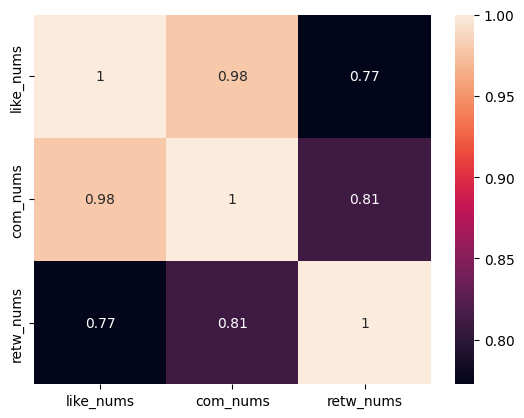

In [46]:
data_corr = data[['点赞数','评论数','转发数']]
data_corr.columns = ['like_nums','com_nums','retw_nums']
data_corr
heat_corr = data_corr.corr(method="spearman")
sns.heatmap(heat_corr, annot=True)
plt.show()

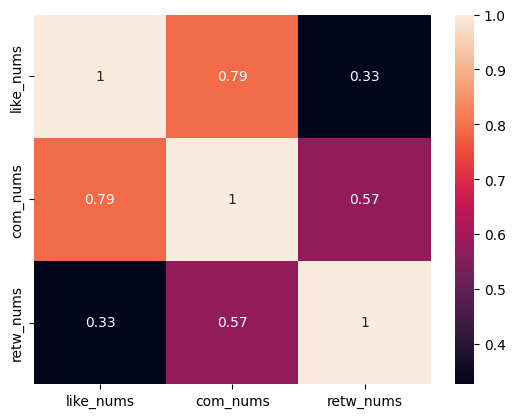

In [47]:
data = pd.read_csv("./ljq_weibo.csv")
del data['Unnamed: 0']
data = data[data.duplicated(subset="id") == False]
data_corr = data[['点赞数','评论数','转发数']]
data_corr.columns = ['like_nums','com_nums','retw_nums']
data_corr
heat_corr = data_corr.corr(method="spearman")
sns.heatmap(heat_corr, annot=True)
plt.show()